## Import Libraries

In [2]:
# import data analysis-related libraries
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import math

# text data processing
import re
from collections import Counter
from wordcloud import WordCloud


## Data Loading and Cleaning

In [3]:
# read the cleaned dataset
cleaned_dataset = pd.read_csv("final_cleaned_data.csv")
cleaned_dataset.head()

link  \
0  https://www.tokopedia.com/samsung/samsung-gala...   
1  https://www.tokopedia.com/samsung/samsung-gala...   
2  https://www.tokopedia.com/distriponsel/xiaomi-...   
3  https://www.tokopedia.com/tecnoofficialstore/t...   
4  https://www.tokopedia.com/tecnoofficialstore/t...   

                                                name      price  rating  \
0                        Samsung Galaxy A05s 6/128GB  1999000.0     2.5   
1                      Samsung Galaxy A25 5G 8/256GB  4049000.0     2.5   
2  Xiaomi Redmi 14C 8/256 GB 6/128 GB Redmi 14 C ...  1385000.0     2.5   
3  TECNO POVA 6 - 12+12GB*+256GB, 70W Ultra Charg...  2769000.0     2.5   
4  TECNO SPARK 30C – 6+6GB*+128GB, 120Hz Display,...  1429000.0     2.5   

   total_sold              store_name store_location  \
0        8000  Samsung Official Store        Jakarta   
1         750  Samsung Official Store        Jakarta   
2         500      Distributor Ponsel        Jakarta   
3         500    Tecno Official Store        Jakarta   
4         250    Tecno Official Store        Jakarta   

                                 product_description  customer_satisfaction  \
0  "awesome offers! - free travel adapter 25w sen...                   99.0   
1  spesifikasi -processor : octa-core -size : 6.5...                   98.0   
2  untuk produk xiaomi, vivo, realme, oppo, samsu...                   98.0   
3  keunggulan: mediatek helio g99 ultimate 6nm 60...                   98.0   
4  keunggulan: 48m main camera sony imx582 sensor...                   97.0   

   IsRated  total_rating  num_reviews  review_rating_ratio brand_name  
0    False        4155.0       1475.0             0.354994    Samsung  
1    False         438.0        169.0             0.385845    Samsung  
2    False         206.0         78.0             0.378641       VIVO  
3    False         371.0        169.0             0.455526      TECNO  
4    False         150.0         77.0             0.513333      TECNO

#### Insight:
- apparently, there are still incorrect data content for IsRated column. some products have received some rating but still flagged as false since the rating data were not scraped and then filled by 2.5.
- to mitigate this issue, we need to replace isRated column with correct value and replace the 2.5 rating value with:
```equation
estimated rating = 4.5 * customer_satisfaction/100 + 2.5*(1-customer_satisfaction)/100
```
It is known that customer_satisfaction = proportion number of people rated 4-5 on the product.

In [4]:
# apparently, there are incorrect data filling process. so let's change it
# change True for non-zero total_rating
cleaned_dataset['IsRated'] = cleaned_dataset['total_rating'] != 0

# replace the default 2.5 rating value with new rating value
# Calculate the estimated rating for rows where Rating = 2.5
cleaned_dataset['new_rating'] = cleaned_dataset.apply(
    lambda row: (
        (4.5 * row['customer_satisfaction'] / 100) + (2.5 * (1 - row['customer_satisfaction'] / 100))
        if row['rating'] == 2.5
        else row['rating']
    ),
    axis=1
)

# show result
cleaned_dataset.head()


link  \
0  https://www.tokopedia.com/samsung/samsung-gala...   
1  https://www.tokopedia.com/samsung/samsung-gala...   
2  https://www.tokopedia.com/distriponsel/xiaomi-...   
3  https://www.tokopedia.com/tecnoofficialstore/t...   
4  https://www.tokopedia.com/tecnoofficialstore/t...   

                                                name      price  rating  \
0                        Samsung Galaxy A05s 6/128GB  1999000.0     2.5   
1                      Samsung Galaxy A25 5G 8/256GB  4049000.0     2.5   
2  Xiaomi Redmi 14C 8/256 GB 6/128 GB Redmi 14 C ...  1385000.0     2.5   
3  TECNO POVA 6 - 12+12GB*+256GB, 70W Ultra Charg...  2769000.0     2.5   
4  TECNO SPARK 30C – 6+6GB*+128GB, 120Hz Display,...  1429000.0     2.5   

   total_sold              store_name store_location  \
0        8000  Samsung Official Store        Jakarta   
1         750  Samsung Official Store        Jakarta   
2         500      Distributor Ponsel        Jakarta   
3         500    Tecno Official Store        Jakarta   
4         250    Tecno Official Store        Jakarta   

                                 product_description  customer_satisfaction  \
0  "awesome offers! - free travel adapter 25w sen...                   99.0   
1  spesifikasi -processor : octa-core -size : 6.5...                   98.0   
2  untuk produk xiaomi, vivo, realme, oppo, samsu...                   98.0   
3  keunggulan: mediatek helio g99 ultimate 6nm 60...                   98.0   
4  keunggulan: 48m main camera sony imx582 sensor...                   97.0   

   IsRated  total_rating  num_reviews  review_rating_ratio brand_name  \
0     True        4155.0       1475.0             0.354994    Samsung   
1     True         438.0        169.0             0.385845    Samsung   
2     True         206.0         78.0             0.378641       VIVO   
3     True         371.0        169.0             0.455526      TECNO   
4     True         150.0         77.0             0.513333      TECNO   

   new_rating  
0        4.48  
1        4.46  
2        4.46  
3        4.46  
4        4.44

In [18]:
# save second version of cleaned data
# cleaned_dataset.to_csv("final_cleaned_data_v2.csv",index=False)

## Text Data Processing

### 1. Initial WordCloud Generation
- to see the original word frequency in product description

In [4]:
# show initial most frequent text in product_description
combined_text = " ".join(cleaned_dataset['product_description'])

# process text by removing punctuation and conversion to lowercase
basic_processed_text = re.sub(r'[^\w\s]','',combined_text).lower()

In [5]:
print(basic_processed_text)

awesome offers  free travel adapter 25w senilai rp299000  free youtube premium 2 bulan syarat  ketentuan berlaku klaim melalui aplikasi samsung gift indonesia selama persediaan masih ada spesifikasi   processor  snapdragon 680  size  67  technology  pls lcd 90 hz  resolution  fhd  rear camera resolution  50mp  2mp  2mp  main camera auto focus  yes  rear camera  ois  no  rear camera  zoom  digital zoom up to 10x  front camera resolution  130 mp  front camera auto focus  no  video resolution  fhd 1920 x 108030fps  ram  6gb  rom  128gb  sim tray  dualsim  network type 4g  usb interface  data cable c to c  usb version  usb 20  earjack  yes  bluetooth version  bluetooth v51  nfc  no  battery capacity  5000mah 25w fast charging support  side fingerprint  yes spesifikasi processor  octacore size  65 technology  super amoled 120hz resolution  fhd rear camera resolution  500 mp  80 mp  20 mp main camera auto focus  yes rear camera  ois  yes rear camera  zoom  digital zoom up to 10x front camera

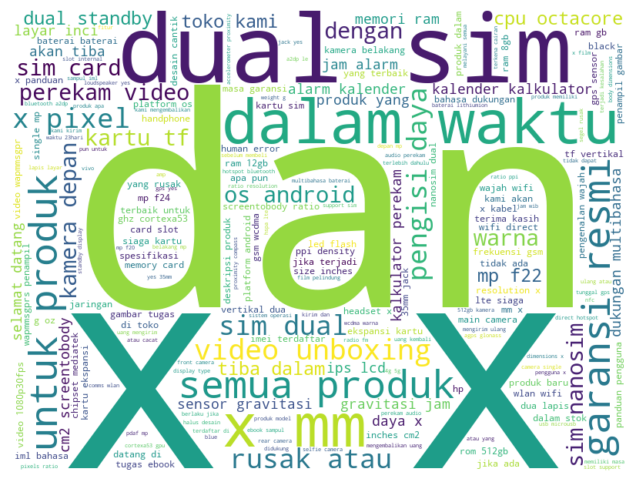

In [10]:
# show in word cloud
initial_wordcloud = WordCloud(width=800,height=600,background_color='white').generate(basic_processed_text)
plt.figure(figsize=(8,6))
plt.imshow(initial_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

#### Insight:
- there are some irrelevant words such as 'dan' = and, 'selamat datang' = welcome, big letter X, 'toko kami' = our store, 'semua produk' = all products.
- let's remove theses words first.


### 2. Removing Irrelevant Words
- remove the pronouns, too basic features (jam, alarm, kalender), connecting words.

In [11]:
# create function for processing data based on list of irrelevant words
def word_filter(irrelevant_words,input_text):
    # split
    split_text = input_text.split()
    filtered_words = [word for word in split_text if word not in irrelevant_words]
    filtered_text_result = " ".join(filtered_words)
    return filtered_text_result
    

In [72]:
# wordcloud generator
def wordcloud_generator(filtered_text_result):
    wordcloud = WordCloud(width=800,height=600,colormap='Set2_r',background_color='white').generate(filtered_text_result)
    plt.figure(figsize=(8,6),dpi=600)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [61]:
from matplotlib import colormaps
print(list(colormaps))

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

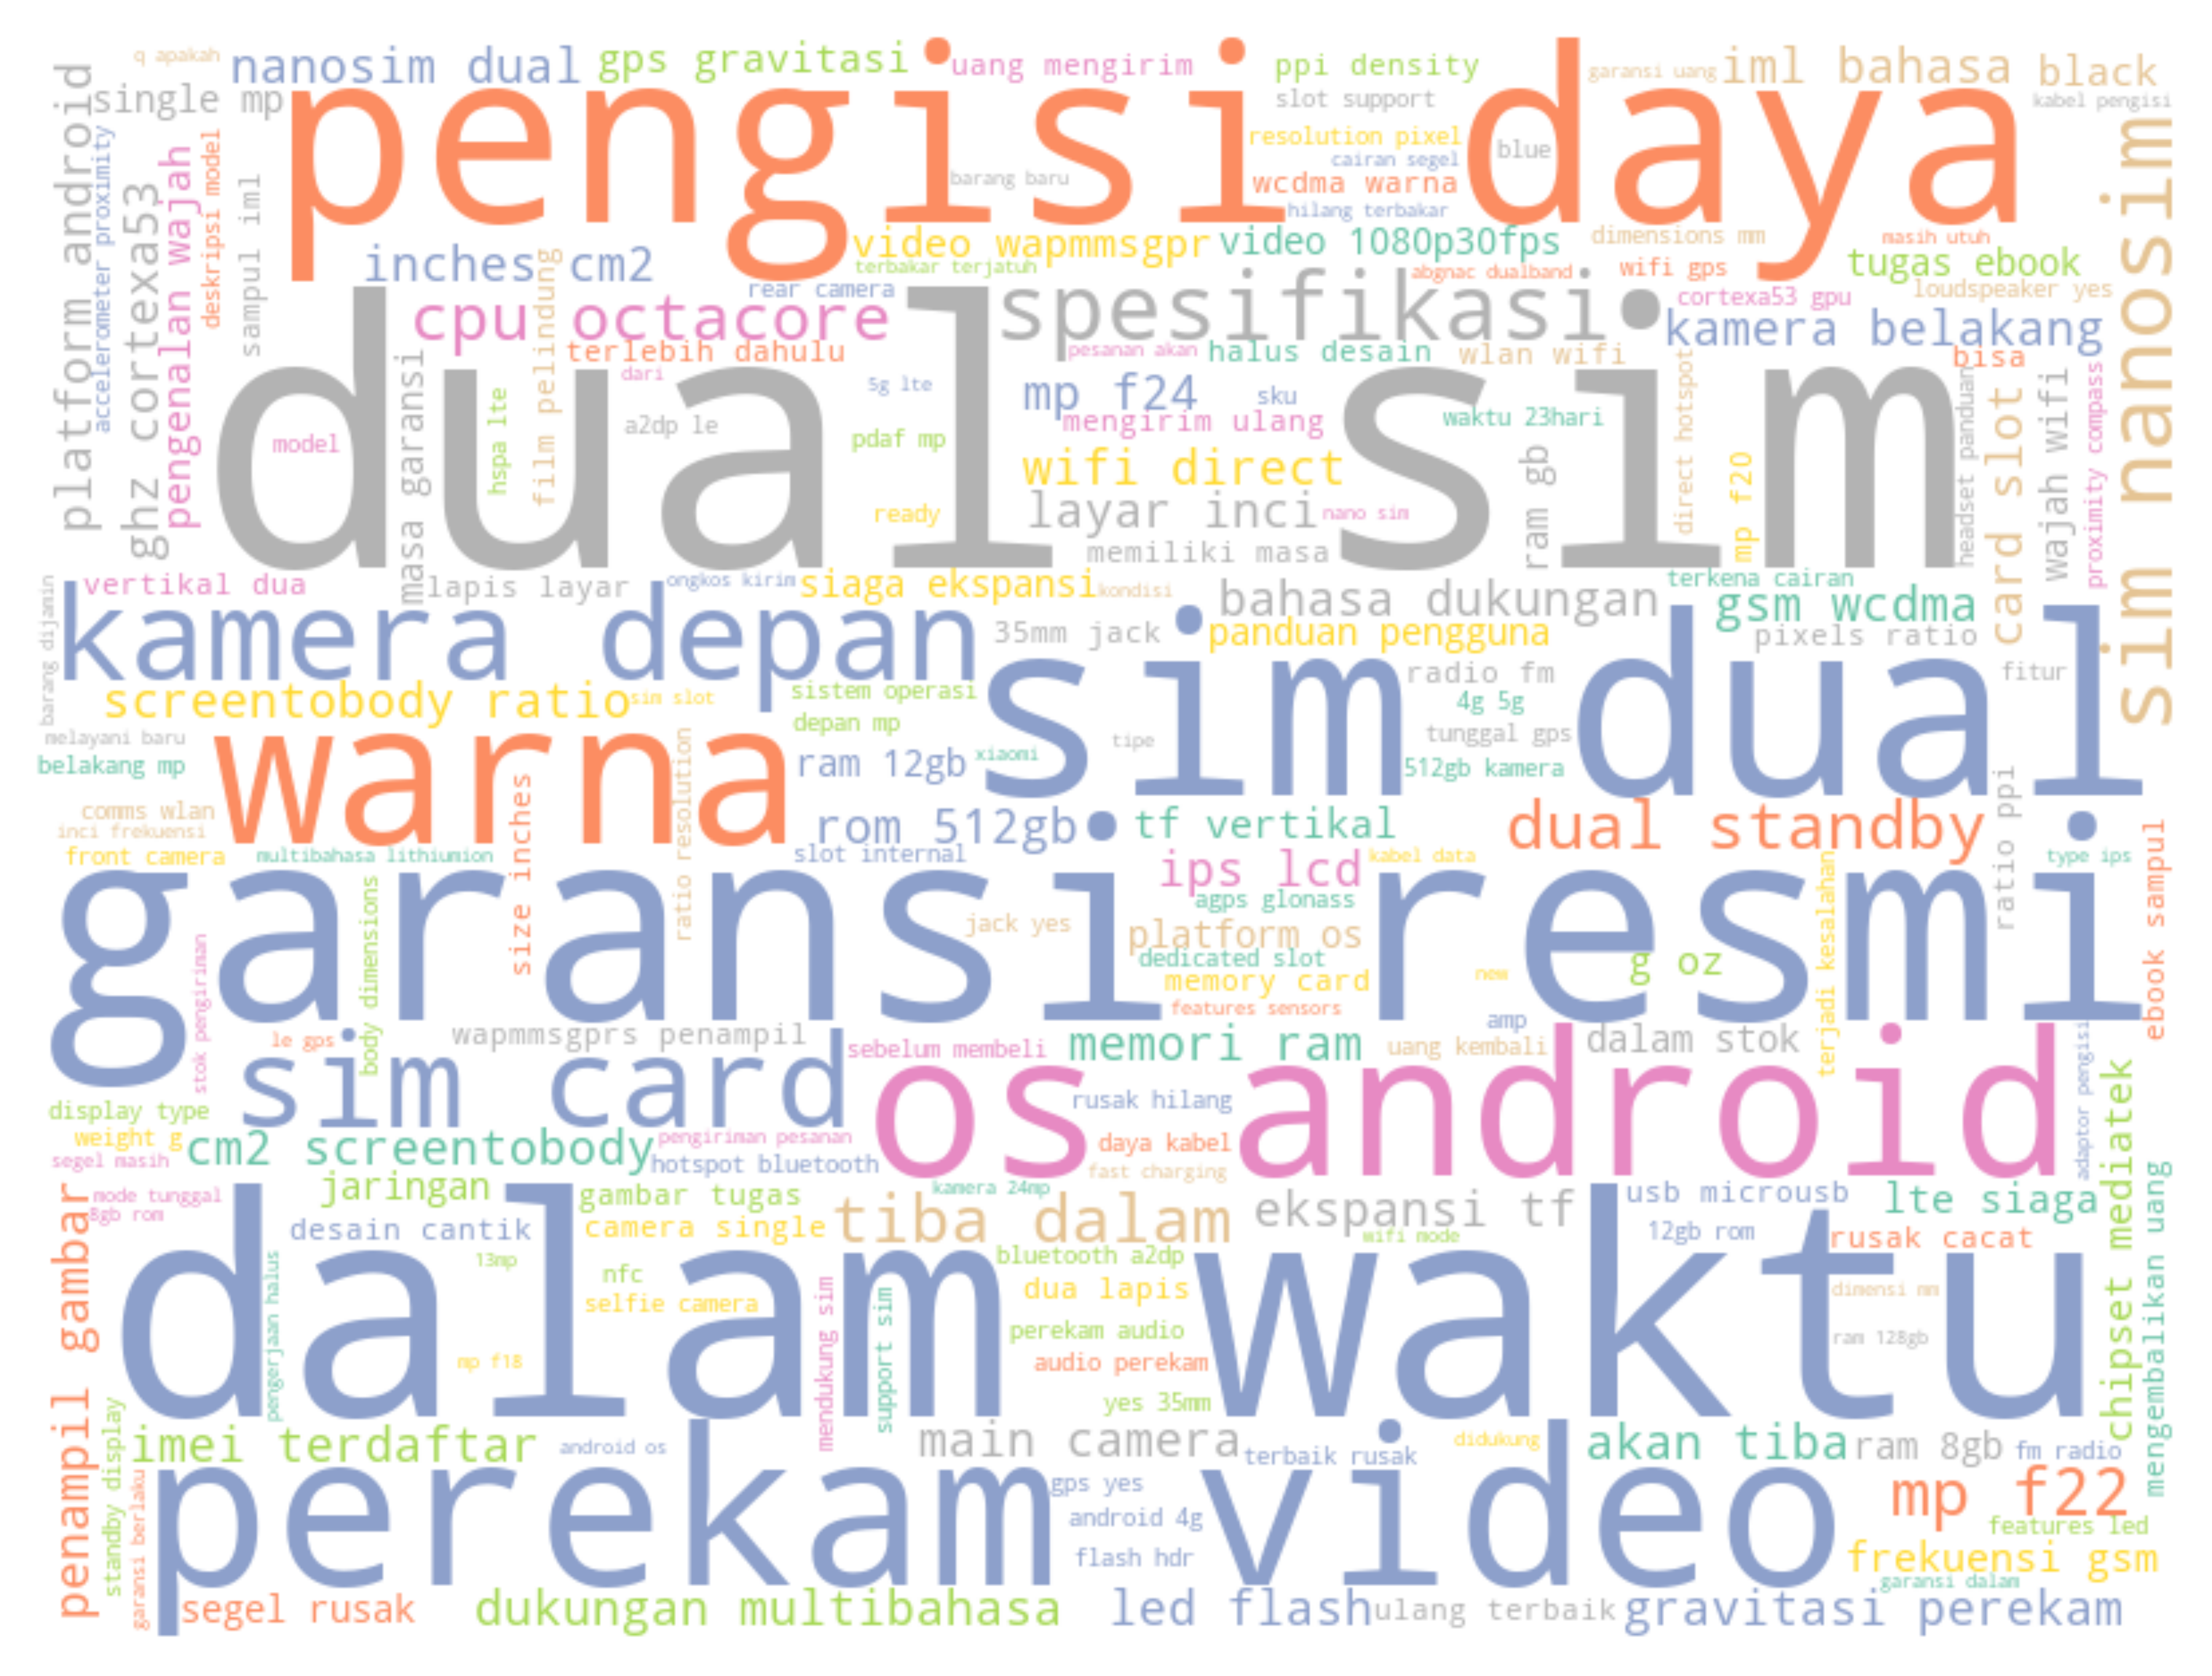

In [73]:
# create word filter to remove the irrelevant words
irrelevant_words = ['anda','atau',"dengan", "dan", "di", "pada", "untuk", "yang", "adalah", "ini", "itu",'selamat','datang','X','x','hp','toko','kami','semua','produk','unboxing','handphone','apa','jika',
                    'pun','tidak','ada','terima','kasih','oppo','jam','human', 'error',"baterai","sensor",'kartu','jam','alarm','kalkulator','kalender','vivo']

# filter text
filtered_text = word_filter(irrelevant_words,basic_processed_text)

# visualize output
wordcloud_generator(filtered_text)

#### Insight:
There are still some redundant words:
1. dual sim = sim dual
2. sim nanosim = nanosim dual
3. perekam video = perekam
4. sim card = kartu sim
5. multibahasa = dukungan multibahasa
6. ekspansi kartu = kartu ekspansi
7. front kamera = kamera depan

We need to unify the terminologies to let other important features emerge in wordcloud.

### 3. Final WordCloud
- standardize keywords and remove service-related keywords (garansi resmi, dalam waktu = punctual delivery)

In [64]:
def standardize_text(text, mappings):
    """
    Standardizes redundant words and phrases in the text based on the provided mappings.

    Args:
        text (str): The input text to standardize.
        mappings (dict): A dictionary of redundant words/phrases and their standardized terms.

    Returns:
        str: The standardized text.
    """
    # Normalize whitespace (replace multiple spaces with a single space)
    text = re.sub(r'\s+', ' ', text.strip())
    # Convert text to lowercase for case-insensitive matching
    text = text.lower()
    
    # Sort mappings by length of the redundant phrase (longer phrases first)
    sorted_mappings = sorted(mappings.items(), key=lambda x: len(x[0]), reverse=True)
    
    # Replace redundant phrases with standardized terms
    for redundant, standard in sorted_mappings:
        text = text.replace(redundant.lower(), standard.lower())
    
    return text

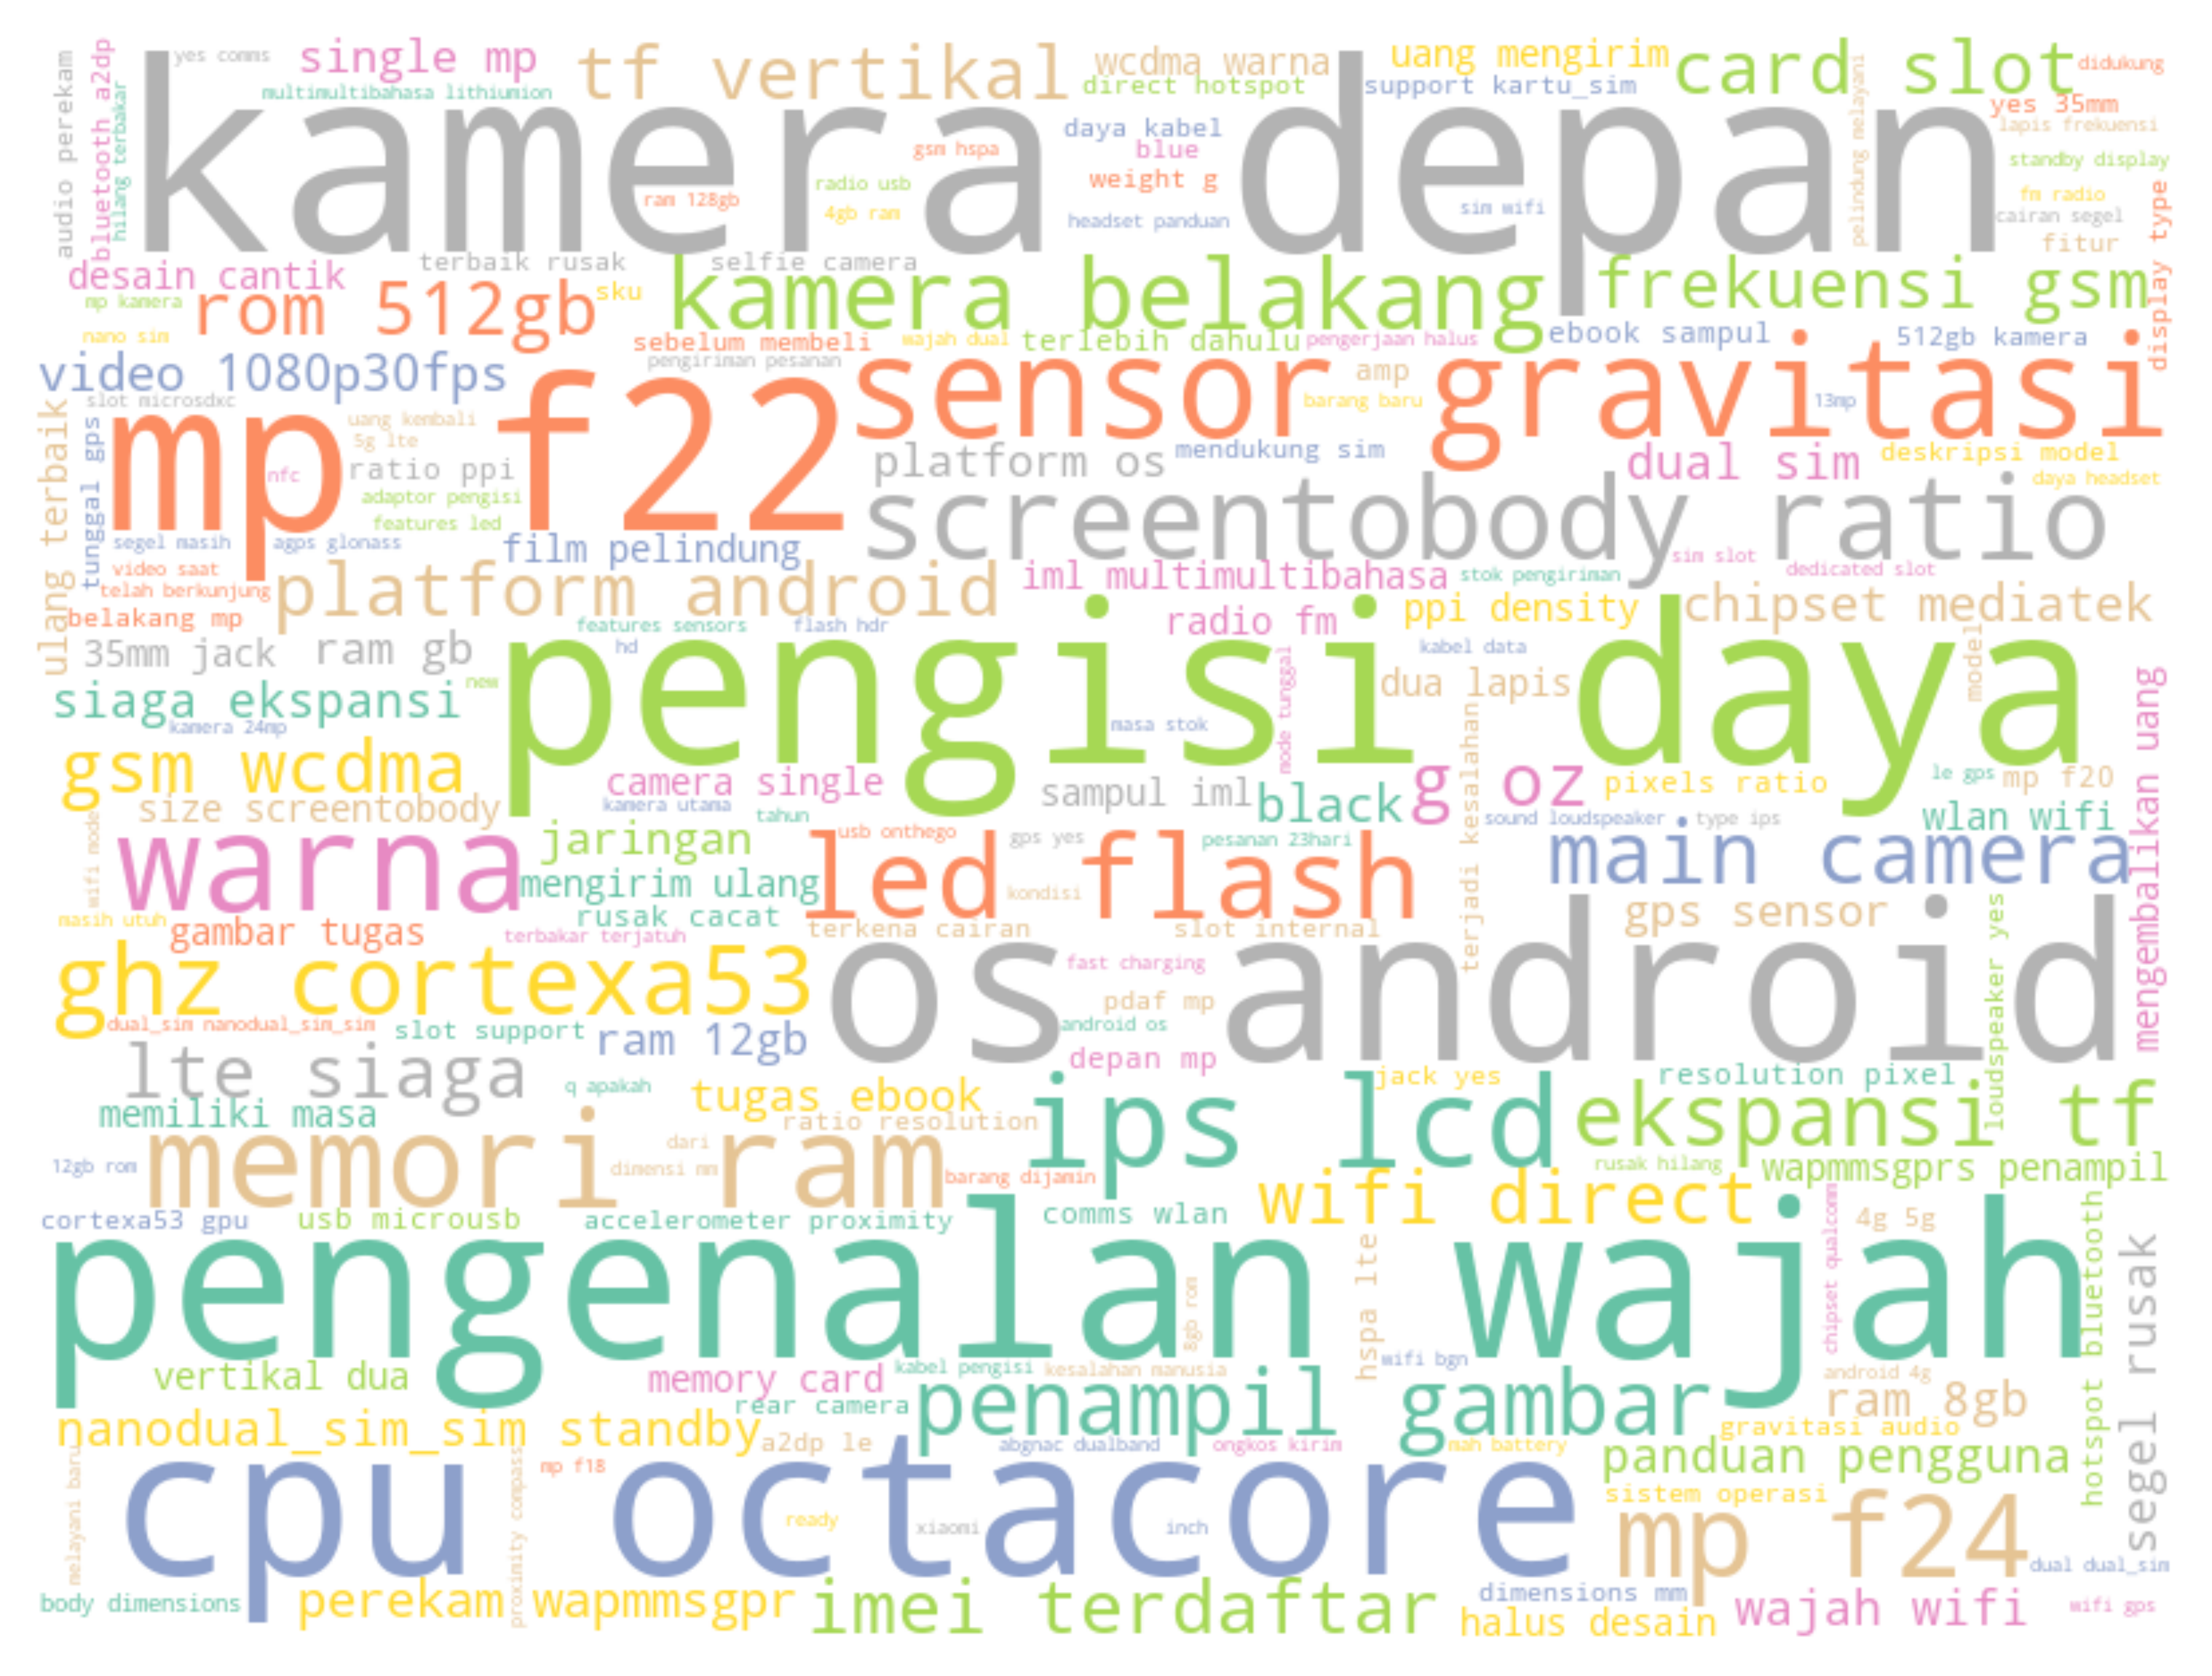

In [74]:
# Mapping of redundant words to standardized terms
mappings = {
    "sim dual": "dual_sim",
    "sim nanosim": "nanosim",
    "nanosim dual": "nanodual_sim",
    "sim nanodual": "nanodual_sim",
    "perekam video": "perekam",
    "sim card": "kartu_sim",
    "multibahasa": "multibahasa",
    "multi-bahasa": "multibahasa",
    "bahasa multibahasa":"multibahasa",
    "dukungan multibahasa":"multibahasa",
    "bahasa":"multibahasa",
    "multimultibahasa":"multibahasa",
    "cpu octa-core":'cpu octacore',
    "octa-core":'cpu octacore',
    "ekspansi kartu": "kartu_ekspansi",
    "front camera": "kamera depan",
    # "alarm": "jam alarm",
    # "alarm kalender": "kalender",
    # "kalender kalkulator":"kalkulator",
    "gravitasi perekam": "sensor gravitasi",
    "gravitasi kalender": "sensor gravitasi",
    "kartu kartu": "kartu",
    "sim sim": "sim",
    "pengenalan wajah": "pengenalan wajah",
    "face recognition": "pengenalan wajah"
}

# filter service keyword
service_words = ['dalam', 'waktu','garansi', 'resmi','spesifikasi','akan','tiba','bisa','layar','inci','inches','cm2']

# filter text
filtered_service_text = word_filter(service_words,filtered_text)
# Remove substrings containing 'httpswww'
cleaned_filtered_text = re.sub(r'httpswww\S*', '', filtered_service_text)  # \S* matches any non-whitespace characters after 'httpswww'

# define new variable
standarized_filtered_text = standardize_text(cleaned_filtered_text,mappings)

# visualize output
wordcloud_generator(standarized_filtered_text)

In [121]:
# Keywords to search semantic meaning on original paragraph
# keywords = ['android']

# # Find sentences containing the keywords
# for desc in cleaned_dataset['product_description']:
#     for keyword in keywords:
#         if keyword in desc.lower():
#             print(f"Found '{keyword}' in: {desc}")

#### Insight:
Final features that these smartphones usually have:
1. kamera depan = front camera
2. pengisian daya = 
3. perekam video = perekam
4. sim card = kartu sim
5. multibahasa = dukungan multibahasa
6. ekspansi kartu = kartu ekspansi
7. front kamera = kamera depan

We need to unify the terminologies to let other important features emerge in wordcloud.

In [28]:
# for loading to tableau, we need to convert our final processed text into dataframe
# dataframe should contain word and its corresponding total frequency
# Step 3: Count word frequencies
final_filtered_words = re.findall(r'\b\w+\b', standarized_filtered_text.lower()) 
print(final_filtered_words)
word_freq = Counter(final_filtered_words)

# Step 4: Convert to a DataFrame
wordcloud_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Step 5: Sort by frequency (optional)
wordcloud_df = wordcloud_df.sort_values(by='Frequency', ascending=False)

wordcloud_df.head(10)

['awesome', 'offers', 'free', 'travel', 'adapter', '25w', 'senilai', 'rp299000', 'free', 'youtube', 'premium', '2', 'bulan', 'syarat', 'ketentuan', 'berlaku', 'klaim', 'melalui', 'aplikasi', 'samsung', 'gift', 'indonesia', 'selama', 'persediaan', 'masih', 'processor', 'snapdragon', '680', 'size', '67', 'technology', 'pls', 'lcd', '90', 'hz', 'resolution', 'fhd', 'rear', 'camera', 'resolution', '50mp', '2mp', '2mp', 'main', 'camera', 'auto', 'focus', 'yes', 'rear', 'camera', 'ois', 'no', 'rear', 'camera', 'zoom', 'digital', 'zoom', 'up', 'to', '10x', 'kamera', 'depan', 'resolution', '130', 'mp', 'kamera', 'depan', 'auto', 'focus', 'no', 'video', 'resolution', 'fhd', '1920', '108030fps', 'ram', '6gb', 'rom', '128gb', 'sim', 'tray', 'dualsim', 'network', 'type', '4g', 'usb', 'interface', 'data', 'cable', 'c', 'to', 'c', 'usb', 'version', 'usb', '20', 'earjack', 'yes', 'bluetooth', 'version', 'bluetooth', 'v51', 'nfc', 'no', 'battery', 'capacity', '5000mah', '25w', 'fast', 'charging', 'sup

Word  Frequency
339        1        490
58       ram        325
54        mp        249
51    kamera        245
162   barang        207
218  android        190
55     video        187
62       sim        167
269     wifi        157
68       usb        157

In [30]:
# save the final processed wordcloud output for visualization on tableau
# wordcloud_df.to_csv('word_frequencies.csv', index=False)

## Other Exploratory Data Analysis

### 1. Smartphone Price Distribution

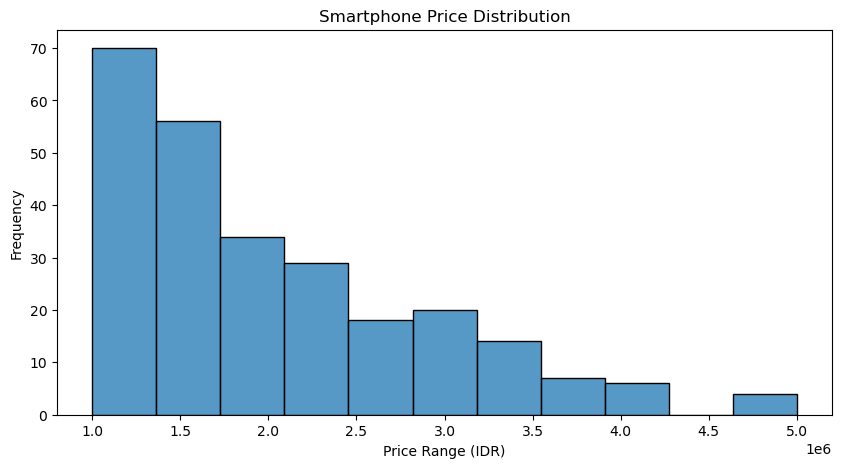

In [7]:
# make histogram
plt.figure(figsize=(10,5))
sns.histplot(data=cleaned_dataset,x='price')
plt.xlabel("Price Range (IDR)")
plt.ylabel('Frequency')
plt.title("Smartphone Price Distribution")
plt.show()


#### Insight:
- The scraped dataset has a severely rightly skewed price distribution with peak between 1 to 1.5 million IDR.
- There is a smooth decreasing trend as the price increases, with a gap towards close to 5 million IDR.

### 2. Brand Share of Total Sales

In [49]:
# pie chart data preparation
pie_chart_df = cleaned_dataset.groupby('brand_name')['total_sold'].sum().reset_index()
pie_chart_df.head()

brand_name  total_sold
0       ASUS           0
1      Advan          11
2      Apple          17
3   EVERCOSS           2
4    Fujitsu           4

In [50]:
# make threshold
threshold_brand_name = pie_chart_df.total_sold >= 20
condition_brand_name = pie_chart_df.brand_name != 'Unknown'

pie_chart_df['brand_name'] = pie_chart_df['brand_name'].where(threshold_brand_name,
                                                              'Other' # replacement for false instance
                                                                )
pie_chart_df['brand_name'] = pie_chart_df['brand_name'].where(condition_brand_name,
                                                              'Other' # replacement for false instance
                                                                )
pie_chart_df.head()


brand_name  total_sold
0      Other           0
1      Other          11
2      Other          17
3      Other           2
4      Other           4

In [51]:
# regroup again
final_pie_chart_df = pie_chart_df.groupby('brand_name')['total_sold'].sum().reset_index()
final_pie_chart_df.head(13)

brand_name  total_sold
0       OPPO         165
1      Other          94
2     Prince          32
3     Realme          30
4    Samsung        8941
5      TECNO        1002
6       VIVO         699
7     Xiaomi         223

In [52]:
# calculate the percentage
final_pie_chart_df['percentage'] = final_pie_chart_df['total_sold'] * 100 /  final_pie_chart_df['total_sold'].sum()
print(final_pie_chart_df['total_sold'].sum())
final_pie_chart_df.head(12)

11186


brand_name  total_sold  percentage
0       OPPO         165    1.475058
1      Other          94    0.840336
2     Prince          32    0.286072
3     Realme          30    0.268192
4    Samsung        8941   79.930270
5      TECNO        1002    8.957626
6       VIVO         699    6.248883
7     Xiaomi         223    1.993563

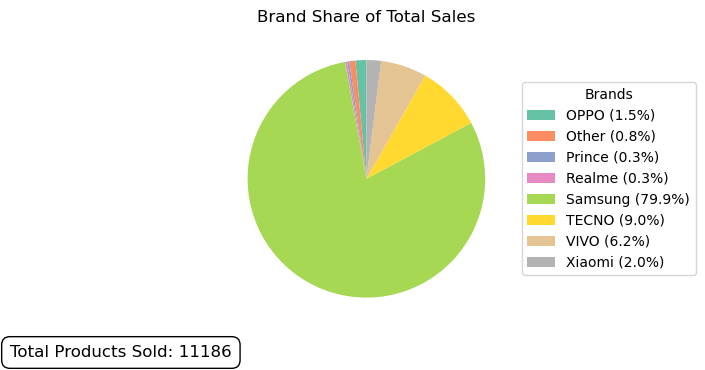

In [64]:
# Create pie chart without labels or percentages
wedges = plt.pie(
    final_pie_chart_df['percentage'],  # Sizes of the slices
    colors=plt.cm.Set2(range(len(final_pie_chart_df))),  # Use 'tab20' colormap
    startangle=90  # Rotate the pie chart (start at 90 degrees)
)

# Add a title
plt.title("Brand Share of Total Sales")

# Format percentages with 1 decimal place and add the % symbol
formatted_percentages = [f"{percentage:.1f}%" for percentage in final_pie_chart_df['percentage']]

# Combine brand_name and formatted percentages for the legend
legend_labels = [f"{brand} ({percentage})" for brand, percentage in zip(final_pie_chart_df['brand_name'], formatted_percentages)]

plt.legend(
    legend_labels,  # Use custom labels for the legend
    title='Brands',  # Legend title
    loc='center left',  # Position the legend
    bbox_to_anchor=(1, 0.5)  # Move the legend outside the chart to the right
)

# sum of total product sold
total_product_sold = final_pie_chart_df['total_sold'].sum()

# Add a text box to display the total product sold
plt.text(
    x=-3, y=-1.5,  # Position of the text box (adjust as needed)
    s=f"Total Products Sold: {total_product_sold}",  # Text to display
    fontsize=12,  # Font size
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')  # Box style
)

# Adjust layout to make space for the legend and text box
plt.tight_layout()

# Show the result
plt.show()

#### Insight:
- The brand that dominated the total sales in the dataset was Samsung at 79.9%, followed by TECNO at 9%, VIVO at 6.2%, and Xiaomi 2.0%.
- The rest brands have share of sales less or equal to 1.5%.
- This result means Samsung has strong presence on Tokopedia,likely due to factors such as widespread availability, competitive pricing, or effective marketing. For Tokopedia, this highlights the importance of maintaining a strong partnership with Samsung while also exploring opportunities to diversify its product offerings. 

### 3. Price Range Analysis of Smartphones by Brand

### 4. Smartphone Sales Performance by OL Store Location

### 5. Customer Satisfaction by Region and Brand